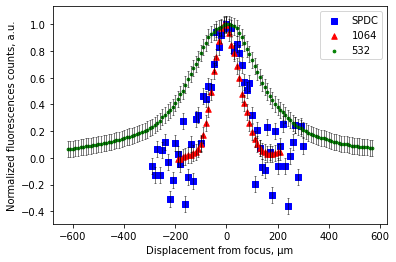

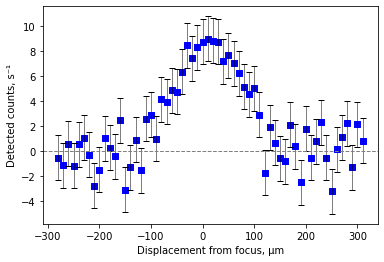

In [19]:
#ID 120 Z-scan analysis: SPDC, green, 1064, background.

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
import statistics
import math  
import os, sys
import pandas as pd


def Z_scan_mean (path, start, stop, scan_step, measurements):
    #function which takes as input path to the data file, start, stop, step and number of measurements per step.
    #Output is a pandas dataframe of average counts per step, same transposed data frame and standard deviation over the step
    step=[]
    raw=[]
    d={}
    std=[]
    std_sum={}
    d=[]
    a=[]
    b=[]
    outputpd=pd.DataFrame()
    outputpd_norm=pd.DataFrame()
    
    step=np.arange(start, stop, scan_step).tolist() #generate a list of translation stage positions, use arange arguments to vary
#loop through all files in path and upload them one after other to raw list
    for filename in os.listdir(path):
        raw=np.loadtxt(path + '\\' + filename, skiprows=6).tolist()
#Dictionary initialization    
        #std[filename]={}
        d = [filename]
#Remove the stage position from and create a nested dictionary {filename:{stage position i:counts value}}
        a=[]
        b=[]
        for i in step:
            raw.remove (round(i,3))
            a = a + [(round(i,3))*1000]
            b = b + [sum (raw[:measurements])/measurements]
            #d[filename] [round(i,3)]= sum (raw[:measurements])/measurements
            std = std+[np.std(raw[:measurements])]
            #std[filename] [round(i,3)]= np.std(raw[:measurements])
            del raw[:measurements]
        
        outputpd['Stage position'] = a
        outputpd['Counts of {}'.format(filename)] = b
        height, length = outputpd.shape
        dum_sum = 0
    for filename in os.listdir(path):   
        dum_sum = dum_sum + outputpd['Counts of {}'.format(filename)]
        outputpd.drop('Counts of {}'.format(filename), inplace=True, axis=1)
    outputpd['Counts'] = dum_sum / (length - 1)    

    return outputpd.T, outputpd, std


#calculate the sum over step in Z-scan and stdev for dark of SPDC measurement values
measurements=100 #specifies how many measurements done per step
path=#set the path to your data here
dark_spdc, dark_spdc_norm, stdark = Z_scan_mean(path, 7.2, 7.8, 0.01, measurements)

#calculate the sum over step in Z-scan and stdev for SDPC values
path=#set the path to your data here
spdc, spdc_norm, stspdc, = Z_scan_mean(path, 7.2, 7.8, 0.01, measurements)
#print (stspdc.to_numpy())

measurements=5 #specifies how many measurements done per step
#calculate the sum over step in Z-scan  and stdev for dark of 532 measurement values
path=#set the path to your data here
dark_532, dark_532_norm, stdd_532 = Z_scan_mean(path, 6.9,8.1,0.01, measurements)

#calculate the sum over step in Z-scan and stdev for 532 values
path=#set the path to your data here
green, green_norm, stgreen = Z_scan_mean(path, 6.9,8.1,0.01, measurements)

#calculate the sum over step in Z-scan  and stdev for dark of 1064 measurement values
path=#set the path to your data here
dark_1064, dark_1064_norm, stdd_1064 = Z_scan_mean(path, 7.3,7.7,0.01, measurements)

#calculate the sum over step in Z-scan and stdev for 1064 values
path=#set the path to your data here
TPA_1064, TPA_1064_norm, std_1064 = Z_scan_mean(path, 7.3,7.7,0.01, measurements) 

spdc=spdc_norm.copy()
spdc=spdc.to_numpy()

#dark level subtraction, normalization and centering of peak to 0
spdc_norm = spdc_norm.to_numpy()
dark_spdc_norm  = dark_spdc_norm.to_numpy()
spdc_norm [:, 1] = spdc_norm [:, 1] - dark_spdc_norm  [:,1]

spdc_norm [:, 1] = spdc_norm [:, 1]/ max(spdc_norm [:, 1] )
dark_spdc_norm[:, 0] = dark_spdc_norm[:, 0] - spdc_norm[np.where((spdc_norm[:, 1]) == max(spdc_norm[:, 1])),0]
spdc_norm[:, 0] = spdc_norm[:, 0]-spdc_norm [np.where((spdc_norm[:, 1]) == max(spdc_norm[:, 1])),0]
xspdc, yspdc = spdc_norm.T

spdc[:, 0] = spdc[:, 0] - spdc[np.where((spdc[:, 1]) == max(spdc[:, 1])),0]
x, y = spdc.T
xdark, ydark = dark_spdc_norm.T

TPA=TPA_1064_norm.copy()
TPA=TPA.to_numpy()

TPA[:, 0] = TPA[:, 0] - TPA[np.where((TPA[:, 1]) == max(TPA[:, 1])),0]
TPA_1064_norm = TPA_1064_norm.to_numpy()
dark_1064_norm  = dark_1064_norm.to_numpy()
TPA_1064_norm [:, 1] = TPA_1064_norm [:, 1] - dark_1064_norm  [:,1]
TPA_1064_norm [:, 1] = TPA_1064_norm [:, 1]/ max(TPA_1064_norm [:, 1] )
TPA_1064_norm[:, 0] = TPA_1064_norm[:, 0] - TPA_1064_norm [np.where((TPA_1064_norm[:, 1]) == max(TPA_1064_norm[:, 1])),0]-10
x1064, y1064 = TPA_1064_norm.T

green=green_norm.copy()
green=green.to_numpy()

green[:, 0] = green[:, 0] - green[np.where((green[:, 1]) == max(green[:, 1])),0]
green_norm = green_norm.to_numpy()
dark_532_norm  = dark_532_norm.to_numpy()
green_norm [:, 1] = green_norm [:, 1] - dark_532_norm  [:,1]
green_norm [:, 1] = green_norm [:, 1]/ max(green_norm [:, 1] )
green_norm [:, 0] = green_norm [:, 0] - green_norm [np.where((green_norm [:, 1]) == max(green_norm [:, 1])),0]# + 0.01
x532, y532 = green_norm.T

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.scatter (xspdc, yspdc, s=30,  marker = 's', color='blue',  label = "SPDC")
ax1.errorbar(xspdc, yspdc, yerr=max(yspdc)*0.06, fmt="None", linewidth = 0.5, color='black',capsize = 1, capthick = 0.5)

ax1.scatter(x1064, y1064, s=30, marker = '^', color='red', label = "1064")
ax1.errorbar(x1064, y1064,  yerr=max(y1064)*0.06, fmt="None", linewidth = 0.5, color='black',capsize = 1, capthick = 0.5)

ax1.scatter(x532, y532, s=30, marker = '.', color='green',label = "532")
ax1.errorbar(x532, y532, yerr=max(y532)*0.06, fmt="None", linewidth = 0.5, color='black',capsize = 1, capthick = 0.5)

plt.xlabel('Displacement from focus, {}m'.format('\u03BC')) 
plt.ylabel('Normalized fluorescences counts, a.u.')
plt.legend()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter (x,y-ydark, s=30,  marker = 's', color='blue', label = "Rh6G")
ax2.errorbar(x, y-ydark, yerr=max((y-ydark))*0.2, fmt="None", linewidth = 0.5, color='black',capsize = 3, capthick = 1)

plt.xlabel('Displacement from focus, {}m'.format('\u03BC')) 
plt.ylabel('Detected counts, s\u207B\u00B9')
plt.axhline(y=0.0, color='grey', linestyle='--', linewidth = 1)

plt.show()

In [20]:
#error propagation using Monte-Carlo method for normalization with subtraction
N=10000
spdc_new = spdc.copy()
spdc_new [:,1] = spdc [:,1] - dark_spdc_norm [:,1]

stnew = ((np.asarray(stdark))**2+(np.asarray(stspdc))**2)**(1/2)

std_MC = []
current_MC = np.empty((len(spdc_new[:,1]),N))
sigma_current = stnew
sigma_max = stnew[int(np.where((spdc_new [:, 1]) == max(spdc_new [:, 1])) [0])]
max_MC = np.random.normal (loc = max(spdc_new [:,1]), scale=sigma_max, size=N)


for i in range(len(spdc_new[:,1])):
    current_MC [i] = sigma_current[i]*np.random.normal (loc=spdc_new [i,1], size=N)
    std_MC = std_MC +[np.std(np.divide(current_MC[i], max_MC))]


stdg_MC = []
currentg_MC = np.empty((len(green[:,1]),N))
sigmag_current = stgreen
sigmag_max = stgreen[int(np.where((green[:, 1]) == max(green[:, 1])) [0])]

maxg_MC = np.random.normal (max(green[:,1]), sigmag_max,size=N)
    
for i in range(len(green[:,1])):
    currentg_MC [i] = np.random.normal (green[i,1], sigmag_current[i], size=N)
    stdg_MC = stdg_MC + [np.std(np.divide(currentg_MC[i], maxg_MC))]
    
stdT_MC = []
currentT_MC = np.empty((len(TPA[:,1]),N))
sigmaT_current = std_1064
sigmaT_max = std_1064[int(np.where((TPA[:, 1]) == max(TPA[:, 1])) [0])]
maxT_MC = np.random.normal (max(TPA[:,1]), sigmaT_max, size=N)
    
for i in range(len(TPA[:,1])):
    currentT_MC [i] = np.random.normal (TPA[i,1], sigmaT_current[i], size=N)
    stdT_MC = stdT_MC + [np.std(np.divide(currentT_MC[i], maxT_MC))]

In [21]:
#error propagation using Monte-Carlo method for normalization without subtraction
N=100000

stnew = ((np.asarray(stdark))**2+(np.asarray(stspdc))**2)**(1/2)
std_MC = []
current_MC = np.empty((len(spdc[:,1]),N))
sigma_current = stnew
sigma_max = stnew [int(np.where((spdc[:, 1]) == max(spdc[:, 1])) [0])]

max_MC = np.random.normal (max(spdc[:,1]), sigma_max, size=N)

for i in range(len(spdc[:,1])):
    current_MC [i] = np.random.normal (spdc[i,1], sigma_current[i], size=N)
    std_MC = std_MC + [np.std(np.divide(current_MC[i], max_MC))]

stdg_MC = []
currentg_MC = np.empty((len(green[:,1]),N))
sigmag_current = stgreen
sigmag_max = stgreen[int(np.where((green[:, 1]) == max(green[:, 1])) [0])]
maxg_MC = np.random.normal (max(green[:,1]), sigmag_max,size=N)
    
for i in range(len(green[:,1])):
    currentg_MC [i] = np.random.normal (green[i,1], sigmag_current[i], size=N)
    stdg_MC = stdg_MC + [np.std(np.divide(currentg_MC[i], maxg_MC))]
    
stdT_MC = []
currentT_MC = np.empty((len(TPA[:,1]),N))
sigmaT_current = std_1064
sigmaT_max = std_1064[int(np.where((TPA[:, 1]) == max(TPA[:, 1])) [0])]
maxT_MC = np.random.normal (max(TPA[:,1]), sigmaT_max, size=N)
    
for i in range(len(TPA[:,1])):
    currentT_MC [i] = np.random.normal (TPA[i,1], sigmaT_current[i], size=N)
    stdT_MC = stdT_MC + [np.std(np.divide(currentT_MC[i], maxT_MC))]

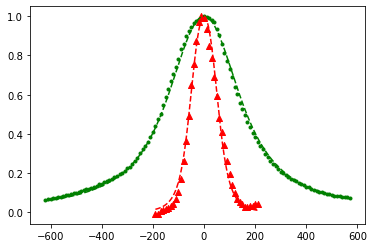

0.017182348729066748
0.034657947580897394


C:\Users\sweet\AppData\Local\Temp/ipykernel_16392/113461410.py:77: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  zss = y_532 [[zs1]]
C:\Users\sweet\AppData\Local\Temp/ipykernel_16392/113461410.py:85: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  zst = y_1064 [[zs2]]


In [28]:
# curve fitting of TPA and SPA data

from numpy import arange
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from scipy.stats import chisquare
import math  

def Lorentzian(z, w0S, wdS, d):
    #function, calculating the dependence of SPA-induced fluorescence as a function of displacement
    #of the thick sample form the focal spot. Takes focal spot size, detector size and sample thickness as input,
    #returns the said dedpendece. 
    
    wz=math.sqrt((w0S**2+lambd**2/(4*math.pi**4*NA**2)+2*wdS**2)/(lambd**2/(4*math.pi**4*w0S**2)+NA**2))
    return wz*(np.arctan((z+d)/wz)-np.arctan((z-d)/wz))/max(wz*(np.arctan((z+d)/wz)-np.arctan((z-d)/wz)))
                        
                        
def DLorentzian(z, w0T, wdT, d):
    #function, calculating the dependence of TPA-induced fluorescence as a function of displacement
    #of the thick sample form the focal spot. Takes focal spot size, detector size and sample thickness as input,
    #returns the said dedpendece. 
    
    zR=math.pi*w0T**2/lambd
    wzTP=math.sqrt((w0T**2+2*lambd**2/(4*math.pi**4*NA**2)+2*(wdT)**2)/(lambd**2/(4*math.pi**4*w0T**2)+2*NA**2))
    return (wzTP*(np.arctan((z+d)/zR)-np.arctan((z-d)/zR)) - zR*(np.arctan((z+d)/wzTP)-np.arctan((z-d)/wzTP))) \
                 /max(wzTP*(np.arctan((z+d)/zR)-np.arctan((z-d)/zR)) - zR*(np.arctan((z+d)/wzTP)-np.arctan((z-d)/wzTP)))



NA=0.7 #set numerical aperture of the excitatin and collection optics
lambd=0.532 #set excitation wavelength

x532, y532 = green_norm.T
x532 = x532.astype(np.float64)
y532 = y532.astype(np.float64)

# curve fitting of SPA experimental data
popt, _ = curve_fit(Lorentzian, x532, y532, p0=[4.5, 12, 80]) #the measured values are chosen as an initial guess

# summarize the parameter values
w0S, wdS, d = popt

plt.scatter(x532, y532, marker = '.', color = 'green')

# define a sequence of inputs between the smallest and largest known inputs
x_532 = arange(min(x532), max(x532), 1)

# calculate the output for the range
y_532 = Lorentzian(x_532, w0S, wdS, d)
plt.plot(x_532, y_532, '--', color='green')

lambd=1.064 #set excitation wavelength

x1064, y1064 = TPA_1064_norm.T
x1064 = x1064.astype(np.float64)
y1064 = y1064.astype(np.float64)

# curve fitting of TPA experimental data

popt, _ = curve_fit(DLorentzian, x1064 , y1064, p0=[2, 12, 60])

# summarize the parameter values
w0T, wdT, d = popt

plt.scatter(x1064, y1064, marker = '^', color = 'red')

# define a sequence of inputs between the smallest and largest known inputs
x_1064 = arange(min(x1064), max(x1064), 1)

# calculate the output for the range
y_1064 = DLorentzian(x_1064, w0T, wdT, d)
plt.plot(x_1064, y_1064, '--', color='red')
plt.show()

#mean-square error between the fit and the SPA data
zs1 =[0] + (np.arange(1,len(y532))*10 - 1).tolist()
zss = y_532 [[zs1]]

MSE_SPA = np.square(np.subtract(zss, y532)).mean()  
 
RMSE_SPA = math.sqrt(MSE_SPA)

#mean-square error between the fit and the TPA data
zs2 =[0] + (np.arange(1,len(y1064))*10 - 1).tolist()
zst = y_1064 [[zs2]]

MSE_TPA = np.square(np.subtract(zst, y1064)).mean() 
 
RMSE_TPA = math.sqrt(MSE_TPA)
print (RMSE_SPA)
print (RMSE_TPA)


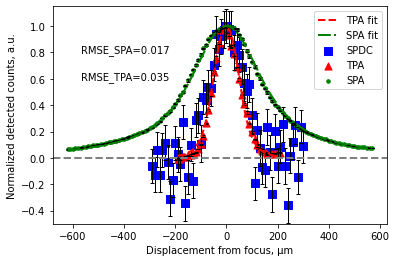

In [29]:
#plotting all together. Error bars are from MC error propagation.
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

plt.scatter (xspdc, yspdc, s=50,  marker = 's', color = 'blue', label = "SPDC")
plt.errorbar(xspdc, yspdc, yerr=std_MC, fmt="None", linewidth = 1, color='black',capsize = 2, capthick = 1)

plt.scatter(x1064, y1064, s=50, marker = '^', color='red', label = "TPA")
plt.errorbar(x1064, y1064,  yerr=stdT_MC, fmt="None", linewidth = 1, color='black',capsize = 2, capthick = 1)
plt.plot(x_1064, y_1064, '--', color='red', linewidth = 2, label = "TPA fit")

plt.scatter(x532, y532, s=50, marker = '.', color='green',label = "SPA")
plt.errorbar(x532, y532, yerr=stdg_MC, fmt="None", linewidth = 1, color='black',capsize = 2, capthick = 1)
plt.plot(x_532, y_532, '-.', color='green', linewidth = 2, label = "SPA fit")

plt.xlabel('Displacement from focus, {}m'.format('\u03BC')) 
plt.ylabel('Normalized detected counts, a.u.')
matplotlib.pyplot.ylim (-0.5,1.15)

plt.legend()

plt.text(-570, 0.8, "RMSE_SPA={:.3f}".format(RMSE_SPA))
plt.text(-570, 0.6, "RMSE_TPA={:.3f}".format(RMSE_TPA))
plt.axhline(y=0.0, color='grey', linestyle='--', linewidth = 2)

0.3830695296552208
0.17107702781358808


C:\Users\sweet\AppData\Local\Temp/ipykernel_16392/1468257345.py:46: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  zss = y_SPDC_S [[zs1]]
C:\Users\sweet\AppData\Local\Temp/ipykernel_16392/1468257345.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  zst = y_SPDC_T [[zs1]]


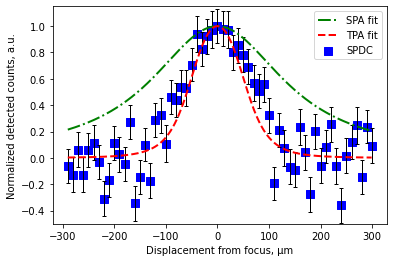

4.652523761413321 44.62340791916336 47.258359622057995


In [30]:
# curve fitting of ETPA data based on TPA and SPA fitting parameters
from numpy import arange
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from scipy.stats import chisquare
import math

lambd=1.064

xspdc, yspdc = spdc_norm.T
xspdc = xspdc.astype(np.float64)
yspdc = yspdc.astype(np.float64)

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)

# curve fit

# define a sequence of inputs between the smallest and largest known inputs
x_SPDC_T = arange(min(xspdc), max(xspdc), 1)

# calculate the output for the range
y_SPDC_T = DLorentzian(x_SPDC_T, w0T, wdT, d)#/max(DLorentzian(x_1064, wzTP, w0, wd, d, zR))

# create a line plot for the mapping function
# plot input vs output
plt.scatter (xspdc, yspdc, s=50,  marker = 's', color = 'blue', label = "SPDC")
plt.errorbar(xspdc, yspdc, yerr=std_MC, fmt="None", linewidth = 1, color='black',capsize = 2, capthick = 1)

# define a sequence of inputs between the smallest and largest known inputs
x_SPDC_S = arange(min(xspdc), max(xspdc), 1)

# calculate the output for the range
y_SPDC_S = Lorentzian(x_SPDC_S, w0S, wdS, d)#/max(DLorentzian(x_532, wz, w0, wd, d))
plt.plot(x_SPDC_S, y_SPDC_S, '-.', color='green', linewidth=2, label = "SPA fit")
    
plt.plot(x_SPDC_T, y_SPDC_T, '--', color='red', linewidth=2,  label = "TPA fit")
plt.xlabel('Displacement from focus, {}m'.format('\u03BC')) 
plt.ylabel('Normalized detected counts, a.u.')

plt.legend() 

#mean-square error between the SPA fit and the ETPA data
zs1 =np.arange(0,len(yspdc))
zs1 =[0] + (np.arange(1,len(yspdc))*10 - 1).tolist()
zss = y_SPDC_S [[zs1]]
MSE_SPA = np.square(np.subtract(zss, yspdc)).mean()  
RMSE_SPA = math.sqrt(MSE_SPA)

#mean-square error between the TPA fit and the ETPA data
zs2 =[0] + (np.arange(1,len(yspdc))*10 - 1).tolist()
zst = y_SPDC_T [[zs1]]
MSE_TPA = np.square(np.subtract(zst, yspdc)).mean() 
RMSE_TPA = math.sqrt(MSE_TPA)

print (RMSE_SPA)
print (RMSE_TPA)

matplotlib.pyplot.ylim (-0.5,1.15)
plt.show()

21.378579482594798
-40.37123670211299


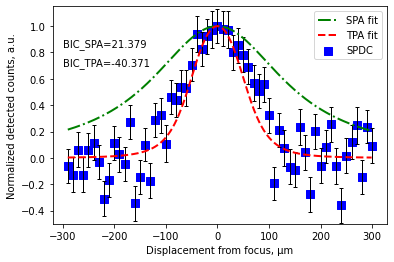

In [26]:
#Bayesian information criterion for TPA and SPA models
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#fit regression model
models = sm.OLS(yspdc, zss).fit()
modelt = sm.OLS(yspdc, zst).fit()

#view BIC of model
print(models.bic)
print(modelt.bic)

plt.figure(fig3)
plt.text(-300, 0.85, "BIC_SPA={:.3f}".format(models.bic))
plt.text(-300, 0.7, "BIC_TPA={:.3f}".format(modelt.bic))

plt.show()